# <H1><center>**Capstone Project 3 - California Housing Prices** 
# <H4><center>By Rafi Fauzan Islami 
--- 
---

# **1. Business Problem Understanding**
---

## **Background**

California adalah negara bagian terpadat di Amerika Serikat dengan populasi lebih dari 39 juta orang. Pertumbuhan populasi yang cepat, terutama di kota-kota besar seperti Los Angeles, San Francisco, dan San Diego, telah mendorong permintaan akan perumahan.  Selain itu, California merupakan salah satu ekonomi terbesar dan paling beragam di dunia. Wilayah ini merupakan pusat teknologi, hiburan, keuangan, dan industri lainnya. Kondisi ekonomi yang kuat, bersama dengan tingkat penghasilan yang tinggi di beberapa daerah, telah menyebabkan harga properti yang tinggi di California.

Dengan keterbatasan lahan yang tersedia dan peraturan pembangunan yang ketat telah membatasi pasokan perumahan di California. Ini telah menyebabkan kenaikan harga properti karena permintaan yang terus meningkat, sementara pasokan perumahan terbatas. Meskipun California memiliki ekonomi yang kuat, ketidaksetaraan sosial dan ekonomi juga menjadi masalah. Harga properti yang tinggi telah menyebabkan kesenjangan antara mereka yang mampu membeli rumah dan mereka yang tidak. Banyak keluarga mengalami kesulitan dalam mencari perumahan yang terjangkau.

Selain California dikenal karena keragaman budaya, etnis, dan demografisnya. Tren demografis, seperti pertumbuhan populasi minoritas yang pesat, juga memengaruhi permintaan dan penawaran perumahan, serta harga properti di berbagai daerah.

## **Problem Statement**

Keterbatasan lahan dan peraturan pembangunan yang ketat di California telah membatasi pasokan perumahan, sementara permintaan terus meningkat karena pertumbuhan populasi yang cepat dan ekonomi yang kuat. Hal ini menyebabkan harga properti yang tinggi, meningkatkan kesenjangan antara mereka yang mampu membeli rumah dan mereka yang tidak. Kondisi ini memperparah ketidaksetaraan sosial dan ekonomi serta menyulitkan banyak keluarga untuk menemukan perumahan yang terjangkau di negara bagian ini. 

Sebagai perusahaan yang bergerak dibidang penjualan properti/rumah, perusahaan ingin mengetahui bagaimana caranya agar dapat menjual propertinya dengan nilai yang optimal untuk penjualan dan membantu keluarga yang ingin membeli rumah dengan harga yang terjangkau.

## **Goals**

Memprediksi harga properti dengan nilai yang optimal untuk penjualan, memungkinkan perusahaan untuk menetapkan harga yang kompetitif dan menguntungkan. Serta, dengan menyediakan informasi yang akurat tentang harga properti, perusahaan dapat membantu mengurangi kesenjangan sosial-ekonomi agar terjangkau bagi semua lapisan masyarakat.

## **Metrics Evaluation**

Metrik evaluasi yang akan digunakan antara lain RMSE (Root Mean Square Error), MAE (Mean Absolute Error), dan MAPE (Mean Absolute Percentage Error), dan MSE (Mean Squared Error). Dimana Mean Squared Error (MSE) adalah rata-rata dari selisih kuadrat antara nilai aktual dan nilai yang diprediksi oleh model, RMSE adalah akar kuadrat dari mean kesalahan kuadrat, MAE adalah mean dari kesalahan absolut, dan MAPE adalah rata-rata persentase kesalahan yang dihasilkan oleh model regresi. Nilai RMSE, MAE, dan MAPE yang lebih kecil menunjukkan bahwa model tersebut lebih akurat dalam memprediksi harga rumah dalam batasan fitur yang digunakan.

Sedangkan Metrics Evaluation yang akan saya gunakan adalah **`MAPE (Mean Absolute Percetage Error)`**, karena :

1. **Interpretasi yang Mudah Dipahami**: MAPE mengukur kesalahan relatif dalam prediksi dengan presentase, sehingga lebih mudah dipahami daripada metrik lainnya seperti MSE (Mean Squared Error) atau RMSE (Root Mean Squared Error).
2. **Respon Terhadap Kesalahan Besar**: MAPE memberikan gambaran yang jelas tentang seberapa besar kesalahan prediksi relatif terhadap nilai sebenarnya. Ini bermanfaat untuk mengetahui seberapa akurat model prediksi, terutama dalam konteks perumahan di mana kesalahan besar dapat memiliki dampak signifikan pada keputusan investasi.
3. **Relevan untuk Tujuan Bisnis**: Dalam industri properti, penting untuk memiliki prediksi yang akurat tentang harga properti untuk mengambil keputusan investasi yang tepat. MAPE membantu dalam mengevaluasi kinerja model prediksi dan meningkatkan keakuratan perkiraan harga properti.

# **2. Data Understanding**
---

Data ini berisi informasi yang berkaitan dengan detail harga dan kondisi rumah-rumah yang terdapat di beberapa distrik di California dan mencakup beberapa statistik ringkasan tentang kondisi demografis berdasarkan data sensus tahun 1990 di California, USA.

**Attributes Information**

| **Nama Kolom** | **Data Type** | **Deskripsi Singkat** |
| --- | --- | --- |
| longitude | float64 | Koordinat garis bujur daerah perumahan |
| latitude | float64 | Koordinat garis lintang daerah perumahan |
| housing_median_age | float64 | Median Usia Bangunan |
| total_rooms | float64 | Total Ruangan dari keseluruhan Rumah di daerah tersebut|
| total_bedrooms | float64 | Total Kamar Tidur dari keseluruhan Rumah di daerah tersebut|
| population | float64 | Populasi di daerah tersebut |
| households | float64 | Jumlah Rumah Tangga di daerah tersebut|
| median_income | float64 | Median pendapatan penduduk di daerah tersebut dengan satuan sepuluh ribu US Dollar |
| ocean_proximity | object  | Jarak Perumahan dari Laut |
| median_house_value | float64 | Median Harga Rumah dengan satuan US dollar |

# **3. Data Preprocessing**
---

## Import Library & Dataset

## Import Library

In [3]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data preprocessing
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import MissingIndicator
from sklearn.decomposition import PCA

# Model_selection
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold, StratifiedKFold, cross_validate

# Modeling
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from category_encoders import BinaryEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.svm import SVR

# Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


## Import Dataset

In [4]:
data = pd.read_csv('data_california_house.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


## Info Data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [6]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [7]:
data.duplicated().sum()

0

**Insight yang didapatkan :**
- Dataset ini memiliki 14448 data dan 10 kolom.
- Terdapat Missing value pada kolom `total_bedrooms` sebesar 137 data.
- Variabel **Numerik** terdapat pada kolom : longitude, latitude, housing_median_age, total_roomsv, total_bedrooms, population, households, median_income, dan median_house_value.
- Variabel **Kategorikal** hanya pada kolom ocean_proximity.
- Tidak terdapat data yang duplikat.

# **4. Exploratory Data Analysis (EDA)**
---

## **Deskriptif Statistik**

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,14448.0,-119.566647,2.006587,-124.3500,-121.8000,-118.4900,-118.0000,-114.3100
latitude,14448.0,35.630093,2.140121,32.5400,33.9300,34.2600,37.7100,41.9500
housing_median_age,14448.0,28.618702,12.596694,1.0000,18.0000,29.0000,37.0000,52.0000
total_rooms,14448.0,2640.132683,2191.612441,2.0000,1451.0000,2125.0000,3148.0000,32627.0000
total_bedrooms,14311.0,538.260709,423.577544,1.0000,295.0000,435.0000,647.0000,6445.0000
population,14448.0,1425.157323,1149.580157,3.0000,784.0000,1165.0000,1724.0000,35682.0000
households,14448.0,499.508929,383.098390,1.0000,279.0000,410.0000,604.0000,6082.0000
median_income,14448.0,3.866667,1.891158,0.4999,2.5706,3.5391,4.7361,15.0001
median_house_value,14448.0,206824.624516,115365.476182,14999.0000,119600.0000,180000.0000,263900.0000,500001.0000


## **Data Numerikal**

In [9]:
numerical_columns = data.columns[data.columns != 'ocean_proximity']

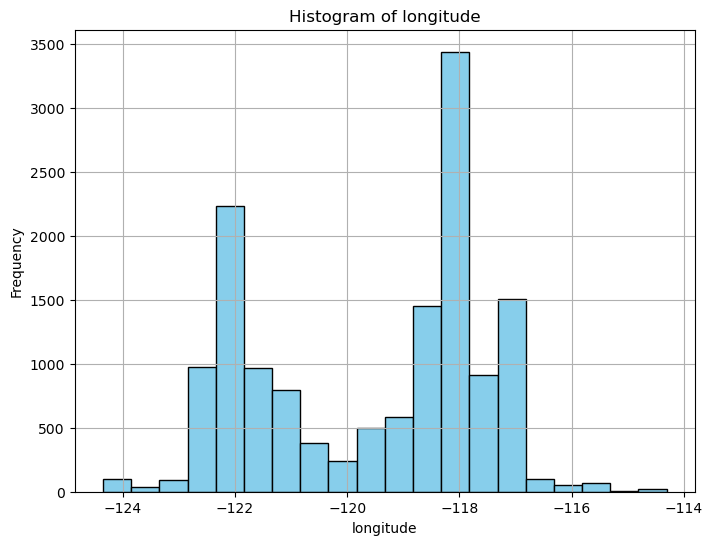

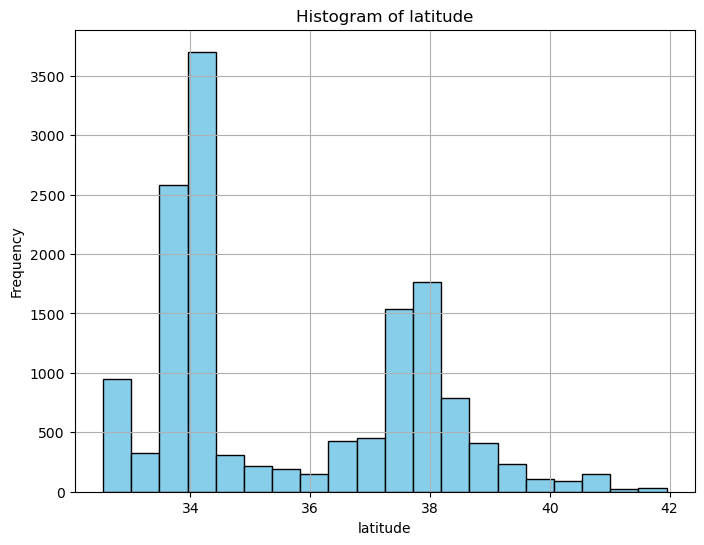

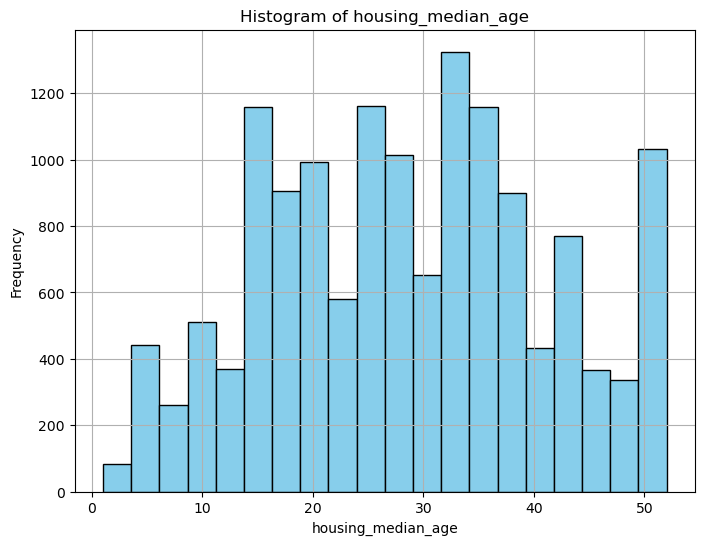

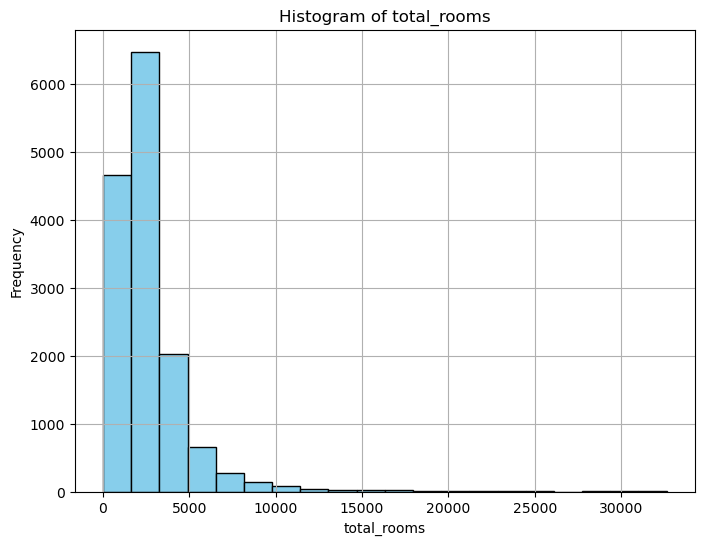

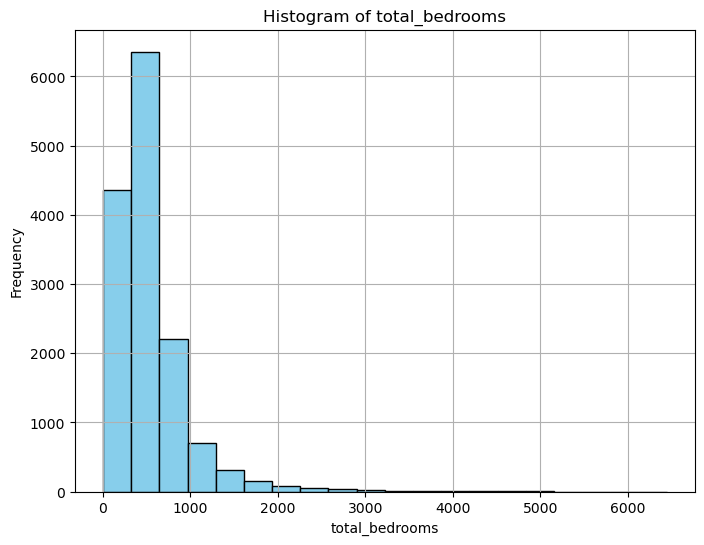

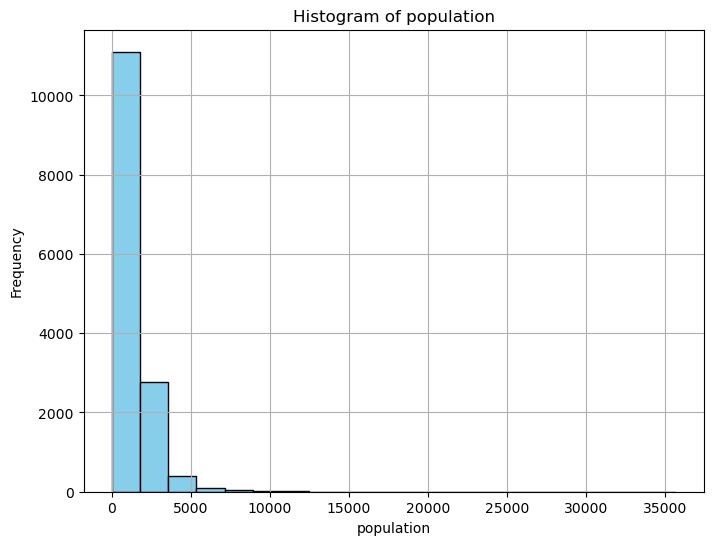

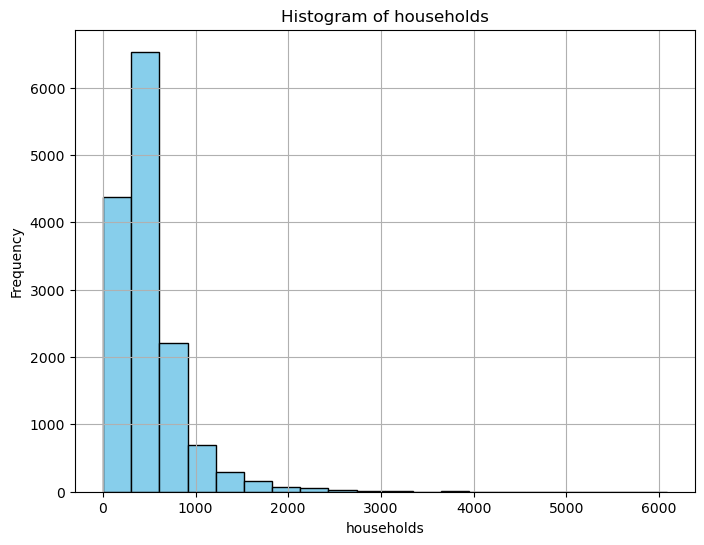

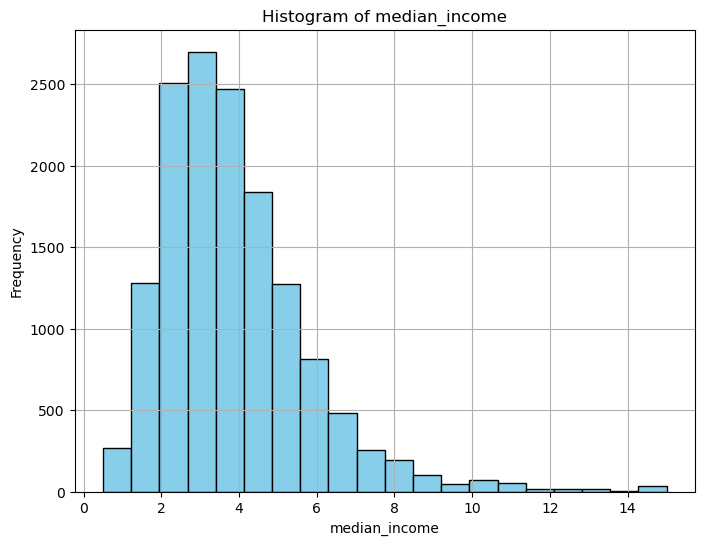

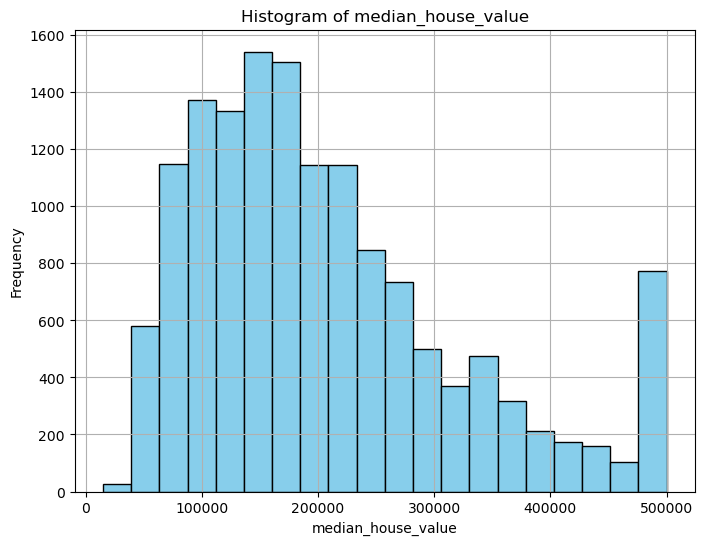

In [10]:
for col in numerical_columns:
    if data[col].dtype in ['int64', 'float64']:  # Menambahkan pengecekan tipe data
        plt.figure(figsize=(8, 6))
        plt.hist(data[col], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

Dalam koding tersebut, saya menambahkan pengecekan tipe data untuk memastikan bahwa kolom yang diproses adalah kolom dengan tipe data numerik (int64 atau float64). Ini akan memastikan bahwa hanya kolom numerik yang akan digunakan dalam pembuatan histogram. 

Serta pada kolom numerikal tersebut, semuanya tidak terdistribusi secara normal atau adanya outliers.

## **Korelasi Setiap Variabel Numerical Dengan Kolom median_house_value**

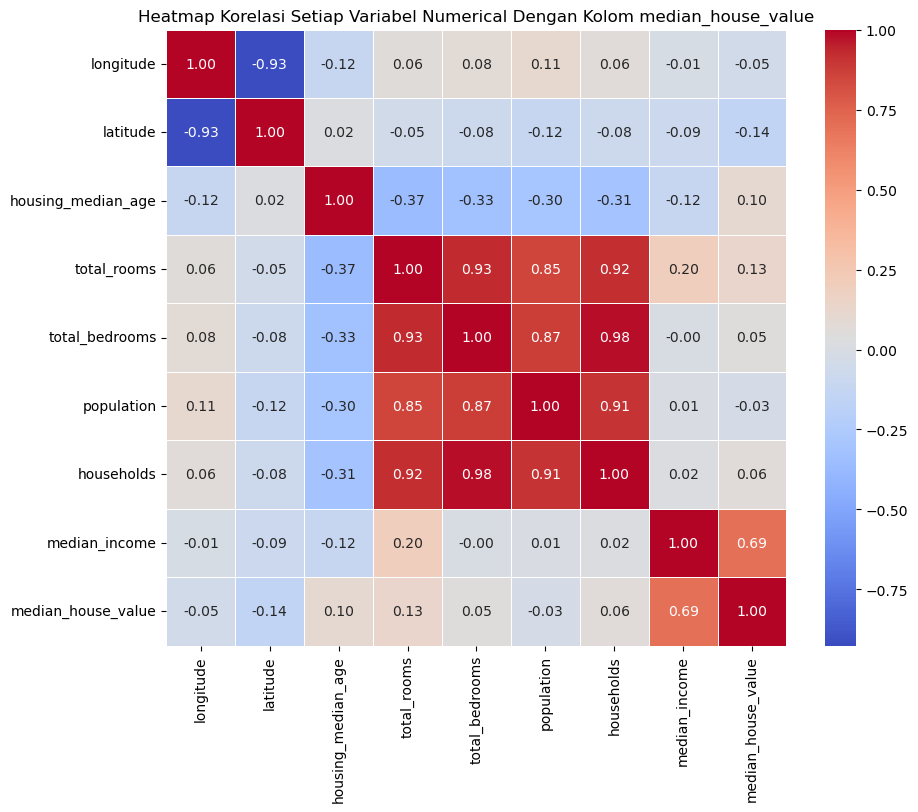

In [11]:
# Mendapatkan korelasi antar variabel
correlation_matrix = data[numerical_columns].corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Setiap Variabel Numerical Dengan Kolom median_house_value')
plt.show()

Pada Heatmap Korelasi diatas dapat disimpulkan bahwa kolom `median_income` dan kolom `median_house_value` dapat disebut memiliki hubungan yang positif. Dengan kata lain, jika pendapatan penduduknya tinggi maka harga jual propertinya pun akan tinggi juga.

## **Data Kategorikal**

In [12]:
data['ocean_proximity'].unique()

array(['INLAND', 'NEAR BAY', '<1H OCEAN', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

Terdapat 5 jenis Kategori pada kolom `ocean_proximity`.

In [13]:
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    1879
NEAR BAY      1622
ISLAND           2
Name: count, dtype: int64

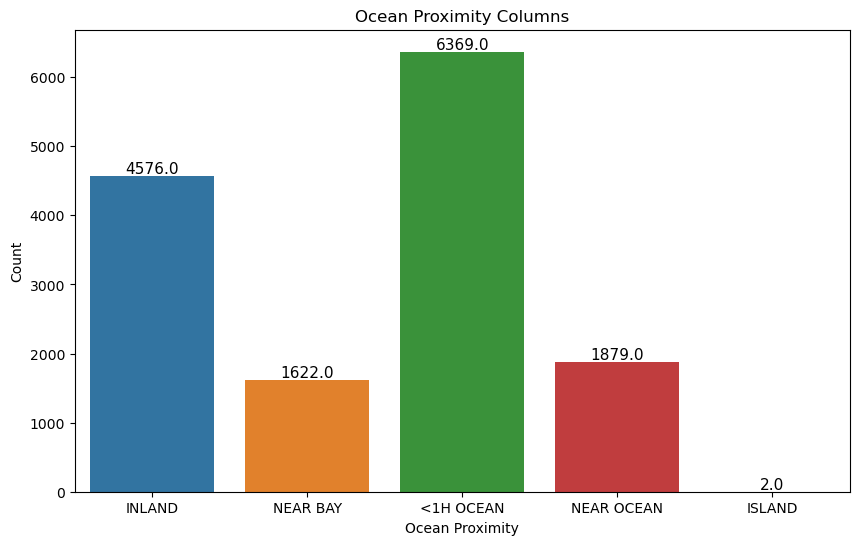

In [14]:
# Membuat subplot
plt.figure(figsize=(10, 6))
sns.countplot(x='ocean_proximity', data=data)
plt.title('Ocean Proximity Columns')
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')

# Menambahkan label angka di atas setiap bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()



Kolom `ocean_proximity` menunjukkan jarak properti terhadap garis pantai, dengan nilai-nilai kategorikal sebagai berikut:

- <1H OCEAN: Properti berada dalam jarak kurang dari 1 jam perjalanan ke samudra.
- INLAND: Properti berada di dalam daratan, jauh dari garis pantai.
- NEAR OCEAN: Properti berada dalam jarak yang cukup dekat dengan samudra, tetapi tidak lebih dari 1 jam perjalanan.
- NEAR BAY: Properti berada dalam jarak yang cukup dekat dengan teluk.
- ISLAND: Properti berada di pulau.

Data dari 2 properti yang berada di kategori ISLAND akan dihapus dari dataset. Penghapusan ini dilakukan jika dua properti tersebut dianggap sebagai outliers karena hanya memiliki 2 properti sedangkan nilai yang lainnya mencapai ribuan. Jika tidak dihilangkan akan menyebabkan **Overfitting** dan membuat tidak akurat untuk model machine learningnya.

### **Handling Data Kategorikal**

Disini saya akan menghapus kategori 'ISLAND' untung menghindari terjadinya overfitting.

In [15]:
# Menampilkan baris dengan kategori 'ISLAND' pada kolom 'ocean_proximity'
island_rows = data[data['ocean_proximity'] == 'ISLAND']

# Menampilkan baris dengan kategori 'ISLAND'
print("Data dengan kategori 'ISLAND':")
print(island_rows)

# Menjatuhkan (drop) baris dengan kategori 'ISLAND' tanpa menghapus nama kategori 'ISLAND'
data = data.drop(island_rows.index)

# Menampilkan data setelah menjatuhkan baris dengan kategori 'ISLAND'
print("\nData tanpa baris kategori 'ISLAND':")
print(data)

Data dengan kategori 'ISLAND':
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
8303     -118.33     33.34                52.0       2359.0           591.0   
12680    -118.48     33.43                29.0        716.0           214.0   

       population  households  median_income ocean_proximity  \
8303       1100.0       431.0         2.8333          ISLAND   
12680       422.0       173.0         2.6042          ISLAND   

       median_house_value  
8303             414700.0  
12680            287500.0  

Data tanpa baris kategori 'ISLAND':
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -119.79     36.73                52.0        112.0            28.0   
1        -122.21     37.77                43.0       1017.0           328.0   
2        -118.04     33.87                17.0       2358.0           396.0   
3        -118.28     34.06                17.0       2518.0          1196.0   
4        -119.81     3

In [16]:
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    1879
NEAR BAY      1622
Name: count, dtype: int64

Kategori `ISLAND` telah saya hapus dari kolom ocean_proximity, dan untuk selanjutkan analisis menggunakan model nya akan lebih mudah.

# **5. Data Preparation**
---

## Handling Missing Value

In [17]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [18]:
data.isna().sum() / len(data) * 100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.948359
population            0.000000
households            0.000000
median_income         0.000000
ocean_proximity       0.000000
median_house_value    0.000000
dtype: float64

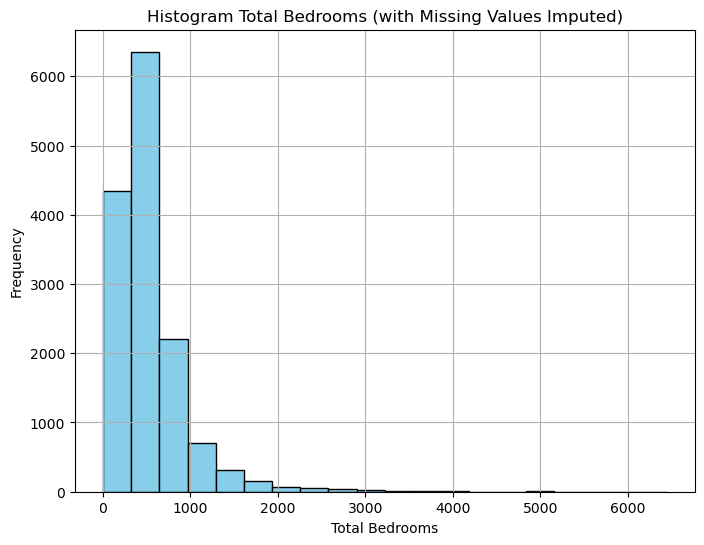

In [19]:
# Membuat histogram
plt.figure(figsize=(8, 6))
plt.hist(data['total_bedrooms'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram Total Bedrooms (with Missing Values Imputed)')
plt.xlabel('Total Bedrooms')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Terdapat Missing value pada kolom `total_bedrooms` sebesar 0.94% atau 137 baris. Dan untuk penanganannya, disini saya akan mengisi nilai NaN dengan median. Karena untuk 137 baris ini, pada kolom median_income dan median_house_value nya akan tetap saya gunakan.

In [20]:
# Memanggil baris dengan missing value pada kolom 'total_bedrooms'
missing_total_bedrooms = data[data['total_bedrooms'].isnull()]

# Menampilkan baris yang memiliki missing value pada kolom 'total_bedrooms'
pd.DataFrame(missing_total_bedrooms)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
88,-121.47,38.61,31.0,1072.0,NaN,781.0,281.0,1.6563,INLAND,65800.0
119,-117.28,34.26,18.0,3895.0,NaN,1086.0,375.0,3.3672,INLAND,133600.0
251,-117.61,34.08,12.0,4427.0,NaN,2400.0,843.0,4.7147,INLAND,158700.0
340,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN,146500.0
410,-122.42,40.44,16.0,994.0,NaN,495.0,181.0,2.1875,INLAND,76400.0
...,...,...,...,...,...,...,...,...,...,...
13856,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN,150400.0
13932,-117.87,33.83,27.0,2287.0,NaN,1140.0,351.0,5.6163,<1H OCEAN,231000.0
13989,-118.40,34.17,24.0,6347.0,NaN,2945.0,1492.0,3.3545,<1H OCEAN,221500.0
14308,-118.55,34.19,18.0,5862.0,NaN,3161.0,1280.0,3.1106,<1H OCEAN,170600.0


In [21]:
# Mengisi missing value dengan median dari kolom 'total_bedrooms'
median_value = data['total_bedrooms'].median()
data['total_bedrooms'].fillna(median_value, inplace=True)

In [22]:
# Menampilkan dataframe setelah mengisi missing value
print("\nDataframe setelah mengisi missing value dengan median pada kolom 'total_bedrooms':")
pd.DataFrame(data)


Dataframe setelah mengisi missing value dengan median pada kolom 'total_bedrooms':


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,435.0,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14446 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14446 non-null  float64
 1   latitude            14446 non-null  float64
 2   housing_median_age  14446 non-null  float64
 3   total_rooms         14446 non-null  float64
 4   total_bedrooms      14446 non-null  float64
 5   population          14446 non-null  float64
 6   households          14446 non-null  float64
 7   median_income       14446 non-null  float64
 8   ocean_proximity     14446 non-null  object 
 9   median_house_value  14446 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.2+ MB


Missing Value sudah tidak ada lagi pada semua kolom termasuk kolom total_bedrooms.

## Duplicated Data

In [24]:
data.duplicated().sum()

0

Tidak terdapat data duplicated pada dataset ini.

## Check & Handling Outliers

### Check Outliers

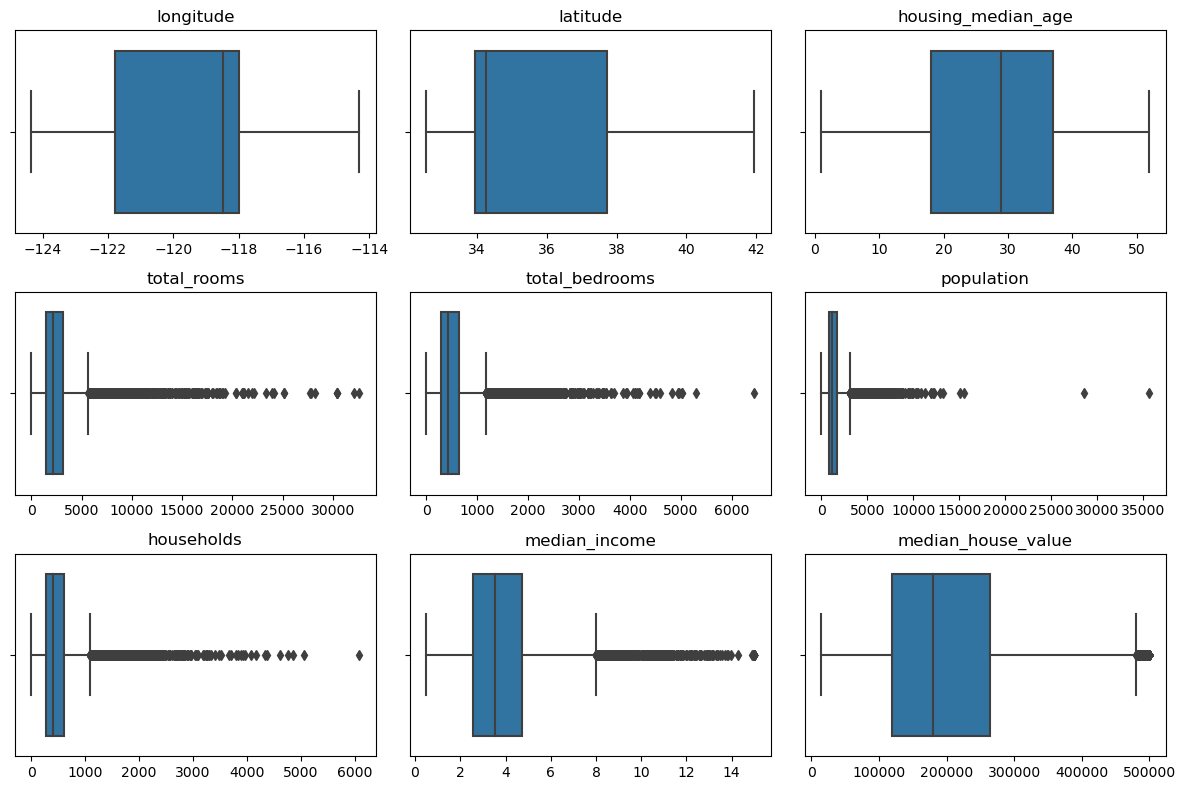

In [25]:
# Membuat boxplot untuk setiap kolom numerik
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, start=1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[column])
    plt.title(column)
    plt.xlabel('')
plt.tight_layout()
plt.show()

Terdapat `outlier` pada kolom 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', dan 'median_house_value'. Disini saya hanya akan menghandle outliers pada kolom `median_house_value` untuk membatasi nilai prediksi model, karena untuk kolom lainnya akan saya biarkan setelah pertimbangan yang cukup efektif untuk menangani outlier ini seperti: penggunaan model yang lebih tahan terhadap outlier, proses cleaning dan feature engineering yang tepat untuk menghandle outlier ini. 

In [26]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,14446.0,-119.566807,2.006679,-124.3500,-121.8000,-118.4900,-118.0000,-114.3100
latitude,14446.0,35.630404,2.140106,32.5400,33.9300,34.2600,37.7100,41.9500
housing_median_age,14446.0,28.617057,12.596064,1.0000,18.0000,29.0000,37.0000,52.0000
total_rooms,14446.0,2640.285339,2191.704433,2.0000,1451.0000,2125.0000,3148.0000,32627.0000
total_bedrooms,14446.0,537.300222,421.703530,1.0000,296.0000,435.0000,645.0000,6445.0000
population,14446.0,1425.249273,1149.626251,3.0000,784.0000,1165.0000,1724.0000,35682.0000
households,14446.0,499.536273,383.114853,1.0000,279.0000,410.0000,604.0000,6082.0000
median_income,14446.0,3.866826,1.891240,0.4999,2.5704,3.5391,4.7361,15.0001
median_house_value,14446.0,206804.650076,115358.542671,14999.0000,119600.0000,179950.0000,263800.0000,500001.0000


In [27]:
    # Calculate quartiles (Q1 and Q3)
q1 = np.percentile(data['median_house_value'].values, 25)
q3 = np.percentile(data['median_house_value'].values, 75)

iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

outliers = (data['median_house_value'].values < lower) | (data['median_house_value'].values > upper)

num_outliers = np.sum(outliers)

print(f"==== {'median_house_value'} ====")
print("Lower Bound:", lower)
print("Upper Bound:", upper)
print(f"Number of Outliers: {num_outliers} \n")

==== median_house_value ====
Lower Bound: -96700.0
Upper Bound: 480100.0
Number of Outliers: 757 



Penjelasan:

- Batas bawah (Lower Bound) dari median_house_value adalah sebesar -96700.0.
- Batas atas (Upper Bound) dari median_house_value adalah sebesar 480100.0.
- Terdapat 757 outlier dalam kolom median_house_value, yaitu nilai-nilai yang berada di luar rentang antara Lower Bound dan Upper Bound. Outlier-outlier ini dapat memiliki dampak yang signifikan terhadap analisis atau model yang bergantung pada kolom ini.

## Handling Outliers

Untuk Handling Outliers ini, saya hanya akan menghandle kolom `median_house_value` yang terdapat 757 outlier. Sedangkan untuk kolom outliers lainnya akan saya biarkan.

In [28]:
data.shape

(14446, 10)

In [29]:
# Membuat dataset baru tanpa outliers
data_baru = data[~outliers]

# Menampilkan ukuran dataset sebelum dan sesudah dihapus outliers
print("Ukuran dataset baru sebelum menghapus outliers:", data.shape)
print("Ukuran dataset baru setelah menghapus outliers:", data_baru.shape)


Ukuran dataset baru sebelum menghapus outliers: (14446, 10)
Ukuran dataset baru setelah menghapus outliers: (13689, 10)


In [30]:
data_baru

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14442,-120.06,36.94,19.0,901.0,183.0,700.0,190.0,2.2375,INLAND,64300.0
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,435.0,704.0,393.0,3.1977,NEAR OCEAN,289300.0


## **SAVE NEW DATA to CSV**


In [31]:
# data_baru.to_csv('California_housing_prices_Clean.csv', index=False)

# **6. FEATURE ENGINEERING**
---

## Define X dan Y

In [32]:
X = data_baru.drop(columns=['median_house_value'])
Y = data_baru['median_house_value']

## Data Splitting

Membagi dataset menjadi train dan test set dengan proporsi 80:20.

In [33]:
# Split data menjadi data train dan test
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    X, 
    Y, 
    test_size=0.2, 
    random_state=42)

In [34]:
# proporsi target di data awal
data['median_house_value'].value_counts(normalize=True)

median_house_value
500001.0    0.046933
137500.0    0.005884
162500.0    0.005469
187500.0    0.004846
225000.0    0.004776
              ...   
50900.0     0.000069
61800.0     0.000069
59900.0     0.000069
300500.0    0.000069
403700.0    0.000069
Name: proportion, Length: 3548, dtype: float64

In [35]:
# proporsi target di data train
Ytrain.value_counts(normalize=True)

median_house_value
137500.0    0.006209
162500.0    0.005844
225000.0    0.005388
112500.0    0.004748
187500.0    0.004657
              ...   
319700.0    0.000091
276900.0    0.000091
59300.0     0.000091
437500.0    0.000091
308400.0    0.000091
Name: proportion, Length: 3303, dtype: float64

In [36]:
# Menunjukan shape masing masing dataset
Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape

((10951, 9), (2738, 9), (10951,), (2738,))

## Numeric & Categorical Features

In [37]:
# Numeric features
numeric_features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income',]

# Categorical features
categorical_features = ['ocean_proximity']

## Encoding

In [38]:
# Preprocessor for numeric and categorical features
preprocessor = ColumnTransformer([
    ('num', RobustScaler(), numeric_features),
    ('One Hot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity'])
], remainder='passthrough')

In [39]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', RobustScaler(),
                                 ['housing_median_age', 'total_rooms',
                                  'total_bedrooms', 'population', 'households',
                                  'median_income']),
                                ('One Hot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['ocean_proximity'])])

In [40]:
# Pipeline for feature engineering
feature_engineering_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])

In [41]:
feature_engineering_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', RobustScaler(),
                                                  ['housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('One Hot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['ocean_proximity'])]))])

## Pipeline dan Model Benchmarking

In [42]:
# Pipeline for Decision Tree Regressor
dt_pipeline = Pipeline(steps=[
    ('feature_engineering', feature_engineering_pipeline),
    ('model', DecisionTreeRegressor(random_state=42))
])

# Pipeline for Linear Regression
lr_pipeline = Pipeline(steps=[
    ('feature_engineering', feature_engineering_pipeline),
    ('model', LinearRegression())
])

# Pipeline for Lasso Regression
lasso_pipeline = Pipeline(steps=[
    ('feature_engineering', feature_engineering_pipeline),
    ('model', Lasso(random_state=42))
])

# Pipeline for Ridge Regression
ridge_pipeline = Pipeline(steps=[
    ('feature_engineering', feature_engineering_pipeline),
    ('model', Ridge(random_state=42))
])

# Pipeline for KNeighbors Regressor
knn_pipeline = Pipeline(steps=[
    ('feature_engineering', feature_engineering_pipeline),
    ('model', KNeighborsRegressor())
])

# Pipeline for DecisionTreeRegressor
dtr_pipeline = Pipeline(steps=[
    ('feature_engineering', feature_engineering_pipeline),
    ('model', DecisionTreeRegressor(random_state=42))
])

# Pipeline for RandomForestRegressor
rf_pipeline = Pipeline(steps=[
    ('feature_engineering', feature_engineering_pipeline),
    ('model', RandomForestRegressor(random_state=42))
])

# Pipeline for AdaBoostRegressor
adaboost_pipeline = Pipeline(steps=[
    ('feature_engineering', feature_engineering_pipeline),
    ('model', AdaBoostRegressor(random_state=42))
])

# Pipeline for GradientBoostingRegressor
gradientboost_pipeline = Pipeline(steps=[
    ('feature_engineering', feature_engineering_pipeline),
    ('model', GradientBoostingRegressor(random_state=42))
])

# Pipeline for XGBRegressor
xgb_pipeline = Pipeline(steps=[
    ('feature_engineering', feature_engineering_pipeline),
    ('model', XGBRegressor(random_state=42))
])

# Pipeline for TransformedTargetRegressor
transformedtarget_pipeline = Pipeline(steps=[
    ('feature_engineering', feature_engineering_pipeline),
    ('model', TransformedTargetRegressor())
])

# Pipeline for SVR
svr_pipeline = Pipeline(steps=[
    ('feature_engineering', feature_engineering_pipeline),
    ('model', SVR())
])




In [43]:
# List of pipelines
pipelines = [dt_pipeline, lr_pipeline, lasso_pipeline, ridge_pipeline, knn_pipeline, dtr_pipeline, rf_pipeline, adaboost_pipeline, gradientboost_pipeline, xgb_pipeline, transformedtarget_pipeline, svr_pipeline]

In [44]:
# List of model names
models = ['Decision Tree', 'Linear Regression', 'Lasso', 'Ridge', 'KNeighbors Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'AdaBoost Regressor', 'GradientBoosting Regressor', 'XGBRegressor', 'TransformedTargetRegressor', 'SVR']


In [45]:
# Fit preprocessor
preprocessor.fit(Xtrain)

# Fit all pipeline
for pipeline in pipelines:
    pipeline.fit(Xtrain, Ytrain)

## Model Evaluation

In [46]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_percentage_error

# Lists to store scores, means, and standard deviations
scores = []
mean = []
std = []

# Fit preprocessor
preprocessor.fit(Xtrain)

# Fit all pipelines and evaluate
for pipeline, model_name in zip(pipelines, models):
    pipeline.fit(Xtrain, Ytrain)
    cv_scores = cross_val_score(pipeline, Xtrain, Ytrain, cv=5, scoring='neg_mean_absolute_percentage_error')
    cv_scores = -cv_scores
    scores.append(cv_scores)
    mean.append(cv_scores.mean())
    std.append(cv_scores.std())

# Create DataFrame for results
results_df = pd.DataFrame({
    'Model': models,
    'Mean MAPE': mean,
    'Std MAPE': std,
    'CV Scores': scores
})

# Sort DataFrame by mean MAPE in descending order
results_df.sort_values(by='Mean MAPE', ascending=True, inplace=True)

# Display the results DataFrame
print(results_df)


                         Model  Mean MAPE  Std MAPE  \
9                 XGBRegressor   0.177310  0.003938   
6       RandomForest Regressor   0.185190  0.006587   
4         KNeighbors Regressor   0.208916  0.006513   
8   GradientBoosting Regressor   0.212153  0.005143   
0                Decision Tree   0.246437  0.006559   
5       DecisionTree Regressor   0.246437  0.006559   
1            Linear Regression   0.271580  0.006089   
10  TransformedTargetRegressor   0.271580  0.006089   
2                        Lasso   0.271583  0.006088   
3                        Ridge   0.271587  0.006088   
7           AdaBoost Regressor   0.440675  0.045045   
11                         SVR   0.497347  0.010864   

                                            CV Scores  
9   [0.17459502338082855, 0.1767126924746879, 0.18...  
6   [0.18465977922796858, 0.18461853769372266, 0.1...  
4   [0.20783346688736898, 0.20113960551257726, 0.2...  
8   [0.21360927152703507, 0.20914959526323548, 0.2...  
0   

**`Kesimpulan hasil Model Evaluation :`**
- Disini saya menggunakan 12 model untuk membandingkan nilai mean `MAPE` yang terbaik untuk diprediksi.
- Dari ke-12 model tersebut, saya mengambil 2 model yang nilai mean `MAPE`nya terbaik yaitu **XGBRegressor dan RandomForest Regressor**.
- **XGBRegressor** memiliki nilai mean `MAPE` terbaik, yaitu senilai 17,7% dan standar deviasi sekitar 0.003938, dan **RandomForest Regressor** memiliki nilai mean `MAPE` terbaik kedua, yaitu senilai 18,5% dan standar deviasi sekitar 0.006587. 

## Prediction with 2 Best Model

In [47]:
# Benchmark 2 model terbaik
rf_pipeline = Pipeline(steps=[
    ('feature_engineering', feature_engineering_pipeline),
    ('model', RandomForestRegressor(random_state=42))
])
# Pipeline for XGBRegressor
xgb_pipeline = Pipeline(steps=[
    ('feature_engineering', feature_engineering_pipeline),
    ('model', XGBRegressor(random_state=42))
    ])

best_models = [rf_pipeline,xgb_pipeline]

In [48]:
scores_mape = []

for pipeline in best_models:
    pipeline.fit(Xtrain, Ytrain)
    cv_best_scores = cross_val_score(pipeline, Xtrain, Ytrain, cv=5, scoring='neg_mean_absolute_percentage_error')
    cv_best_scores = -cv_best_scores
    scores_mape.append(cv_best_scores.mean())

score_before_tuning = pd.DataFrame({'MAPE': scores_mape}, index=['RandomForest Regressor', 'XGBRegressor'])
score_before_tuning.sort_values(by='MAPE',ascending=True, inplace=True)
score_before_tuning

,MAPE
XGBRegressor,0.17731
RandomForest Regressor,0.18519


XGBRegressor dan RandomForest Regressor	memiliki nilai hasil prediksi mape antara 17,7% sampai 18,5%.

# **7. HYPERPARAMETER TUNING**

Hyperparameter tuning menggunakan RandomizedSearchCV adalah pendekatan yang efisien untuk menemukan kombinasi hyperparameter terbaik untuk model. Pendekatan ini secara acak memilih serangkaian nilai hyperparameter dari sebuah distribusi yang ditentukan sebelumnya. Hal ini berbeda dengan GridSearchCV yang secara sistematis mencoba semua kombinasi hyperparameter yang diberikan.

Keuntungan utama RandomizedSearchCV adalah efisiensinya dalam mencari ruang hyperparameter yang besar. Dengan hanya menguji sejumlah acak dari seluruh ruang hyperparameter, proses pencarian dapat dilakukan dalam waktu yang lebih singkat, terutama jika ruang hyperparameter tersebut sangat besar.

Singkatnya, RandomizedSearchCV adalah pendekatan yang efisien untuk mencari kombinasi hyperparameter terbaik dengan mengeksplorasi ruang hyperparameter secara acak, sehingga menghemat waktu komputasi dibandingkan dengan pendekatan yang memeriksa setiap kombinasi secara sistematis.

## Tuning XGBRegressor

In [78]:
from sklearn.model_selection import RandomizedSearchCV



# Define parameter grid for XGBRegressor
param_grid_xgb = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0],
    'model__gamma': [0, 0.1, 0.2],
}

# Instantiate RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(estimator=xgb_pipeline, param_distributions=param_grid_xgb,
                                   n_iter=100, scoring='neg_mean_absolute_percentage_error', cv=5,
                                   random_state=42, n_jobs=-1)




# Fit RandomizedSearchCV
random_search_xgb.fit(Xtrain, Ytrain)
# Get the best estimator
best_xgb_pipeline = random_search_xgb.best_estimator_


# Evaluate the best model
cv_best_scores_tuned = cross_val_score(best_xgb_pipeline, Xtrain, Ytrain, cv=5, scoring='neg_mean_absolute_percentage_error')
cv_best_scores_tuned = -cv_best_scores_tuned
mean_mape_tuned = cv_best_scores_tuned.mean()

# Create DataFrame for scores after tuning
score_after_tuning = pd.DataFrame({'MAPE': [mean_mape_tuned]}, index=['XGBRegressor'])
score_after_tuning.sort_values(by='MAPE', ascending=True, inplace=True)
best_score_xgb = score_after_tuning

# Display the DataFrame
print(best_score_xgb)


                  MAPE
XGBRegressor  0.169731


In [50]:
# Get the best parameters
best_params_xgb = random_search_xgb.best_params_

# Display the best parameters
print("Best Parameters for XGBRegressor:")
for param, value in best_params_xgb.items():
    print(f"{param}: {value}")

# Output the result


Best Parameters for XGBRegressor:
model__subsample: 1.0
model__n_estimators: 200
model__max_depth: 7
model__learning_rate: 0.1
model__gamma: 0
model__colsample_bytree: 0.6


Setelah melakukan tuning dengan menggunakan RandomizedSearchCV pada XGBRegressor, hasilnya menunjukkan bahwa model yang dihasilkan memiliki MAPE sebesar 0.169731. Proses tuning menghasilkan parameter terbaik untuk XGBRegressor sebagai berikut:
- model__subsample: 1.0
- model__n_estimators: 200
- model__max_depth: 7
- model__learning_rate: 0.1
- model__gamma: 0
- model__colsample_bytree: 0.6

Hal ini menunjukkan bahwa model XGBRegressor yang telah dituning memiliki tingkat akurasi yang lebih baik dibandingkan dengan model sebelumnya, dengan MAPE yang lebih rendah, sehingga lebih mampu memprediksi target variabel dengan kesalahan yang lebih kecil.

## Tuning RandomForest Regressor

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'model__n_estimators': randint(100, 200),  # Number of trees in the forest
    'model__max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'model__max_depth': randint(10, 110),  # Maximum number of levels in tree
    'model__min_samples_split': randint(2, 10),  # Minimum number of samples required to split a node
    'model__min_samples_leaf': randint(1, 10),  # Minimum number of samples required at each leaf node
    'model__bootstrap': [True, False]  # Method of selecting samples for training each tree
}

# Perform RandomizedSearchCV
random_search_rf = RandomizedSearchCV(estimator=rf_pipeline, param_distributions=param_grid, n_iter=30,
                                   cv=5, scoring='neg_mean_absolute_percentage_error', verbose=1, 
                                   random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV to find the best hyperparameters
random_search_rf.fit(Xtrain, Ytrain)

# Get the best parameters and best score
best_params_rf = random_search_rf.best_params_
best_score_rf = -random_search_rf.best_score_

# Print the best parameters and best score
print("Best Parameters for RandomForestRegressor:", best_params_rf)
print("Best MAPE Score for RandomForestRegressor:", best_score_rf)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


Best Parameters for RandomForestRegressor: {'model__bootstrap': True, 'model__max_depth': 58, 'model__max_features': 'auto', 'model__min_samples_leaf': 3, 'model__min_samples_split': 5, 'model__n_estimators': 154}
Best MAPE Score for RandomForestRegressor: 0.18450363955881366


Tuning RandomForest Regressor :
- Saya telah menggunakan RandomizedSearchCV untuk mencari melalui ruang parameter yang telah ditentukan.
- n_iter = 30 di RandomizedSearchCV menentukan jumlah pengaturan parameter yang dijadikan sampel sebanyak 30 sampel.
- Setelah memasang RandomizedSearchCV, saya mendapatkan nilai parameter terbaik dan skor terbaik untuk `MAPE` yaitu sebesar 18,4%

## Before & After Tuning

In [53]:
# Create DataFrame for scores before tuning
score_before_tuning = pd.DataFrame({'Before Tuning': scores_mape}, index=['RandomForest Regressor', 'XGBRegressor'])
score_before_tuning.sort_values(by='Before Tuning', ascending=True, inplace=True)

# Get MAPE scores after tuning
score_after_tuning = pd.DataFrame({'After Tuning': [-best_score_rf, -best_score_xgb]}, index=['RandomForest Regressor', 'XGBRegressor'])

# Combine DataFrames for comparison
comparison_df = pd.concat([score_before_tuning, score_after_tuning], axis=1)

# Display the comparison DataFrame
print("Comparison of MAPE scores before and after tuning:")
print(pd.DataFrame(comparison_df))


Comparison of MAPE scores before and after tuning:
                        Before Tuning  \
XGBRegressor                  0.17731   
RandomForest Regressor        0.18519   

                                                         After Tuning  
XGBRegressor                              MAPE
XGBRegressor -0.169731  
RandomForest Regressor                                      -0.184504  


In [56]:
# # Get the best estimator
# best_rf_pipeline = random_search_rf.best_estimator_


Sebelum tuning, MAPE untuk XGBRegressor adalah sekitar 17,7% dan untuk RandomForest Regressor adalah sekitar 18,5%. Setelah tuning, MAPE untuk XGBRegressor meningkat menjadi sekitar 16,9%, sedangkan untuk RandomForest Regressor meningkat menjadi sekitar 18,4%.

Perbedaan antara skor sebelum dan sesudah tuning dapat dihitung dengan mengurangkan skor sesudah tuning dari skor sebelum tuning.

- Untuk XGBRegressor: 0.17731 - 0.169731 = 0.007579 / 0.7%
- Untuk RandomForest Regressor: 0.18519 - 0.184504 = 0.000686 / 0.06%

Perbedaan ini mengindikasikan bahwa setelah tuning, performa model secara signifikan meningkat untuk XGBRegressor, sementara untuk RandomForest Regressor, peningkatan performa tidak begitu signifikan.

## Predict 

In [72]:
# Prediksi menggunakan model XGBRegressor yang sudah dituning
predictions_xgb = best_xgb_pipeline.predict(Xtest)

# Tampilkan hasil prediksi
print(predictions_xgb)

[158230.69  98307.85 262634.28 ... 166748.94 214399.97  81914.81]


In [86]:
mean_absolute_percentage_error(Ytest, predictions_xgb)

0.17049613919613182

In [89]:
hasil_test_XGB = pd.DataFrame({'Predicted':predictions_xgb,'Actual':Ytest})

In [90]:
hasil_test_XGB['Different'] = hasil_test_XGB['Predicted'] - hasil_test_XGB['Actual']

In [91]:
hasil_test_XGB

,Predicted,Actual,Different
9840,158230.687500,154700.0,3530.687500
3082,98307.851562,96300.0,2007.851562
8673,262634.281250,318000.0,-55365.718750
7807,99117.726562,80200.0,18917.726562
1689,330486.718750,341500.0,-11013.281250
...,...,...,...
7832,257307.921875,299200.0,-41892.078125
3038,268131.000000,248700.0,19431.000000
13597,166748.937500,161900.0,4848.937500
7621,214399.968750,188300.0,26099.968750


[158230.69  98307.85 262634.28 ... 166748.94 214399.97  81914.81]


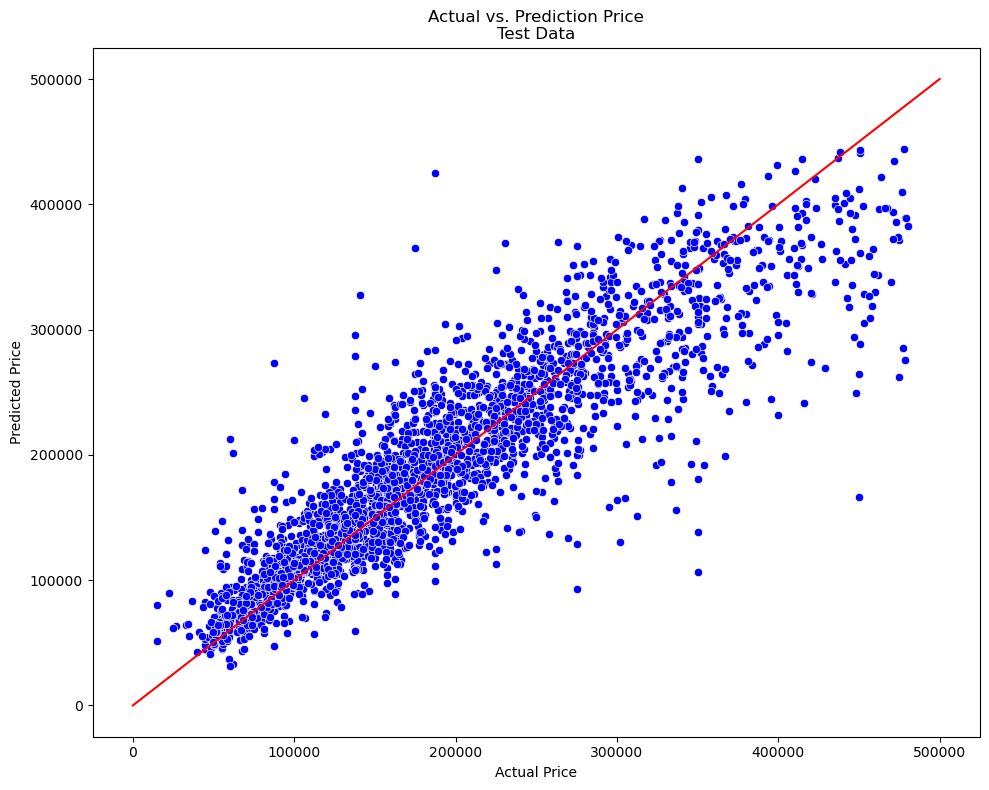

In [94]:
# Prediksi menggunakan model XGBRegressor yang sudah dituning
predictions_xgb = best_xgb_pipeline.predict(Xtest)

# Tampilkan hasil prediksi
print(predictions_xgb)
mean_absolute_percentage_error(Ytest, predictions_xgb)
hasil_test_XGB = pd.DataFrame({'Predicted':predictions_xgb,'Actual':Ytest})
hasil_test_XGB['Different'] = hasil_test_XGB['Predicted'] - hasil_test_XGB['Actual']

# Create scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=Ytest, y=hasil_test_XGB['Predicted'], color='blue').set(title='Actual vs. Prediction Price\nTest Data', 
                                                                          xlabel='Actual Price', 
                                                                          ylabel='Predicted Price')
sns.lineplot(x=np.arange(0, 500000), y=np.arange(0, 500000), color='red')
plt.tight_layout()
plt.show()


Gambar tersebut merupakan perbandingan antara harga yang diprediksi (Predicted Price) dan harga aktual (Actual Price) suatu data. Di kolom kiri adalah harga yang diprediksi, sedangkan di kolom kanan adalah harga aktual. Tabel ini dapat digunakan untuk mengukur kinerja prediksi harga, dimana lebih rendah selisih antara harga yang diprediksi dan harga aktual, maka akurasi prediksi akan lebih tinggi. Selain itu, tabel ini juga menunjukkan ada beberapa data yang diprediksi dengan nilai 0, sedangkan harga aktualnya 100000.

Dalam tabel tersebut, terdapat juga data uji (Test Data) yang digunakan untuk menguji kinerja prediksi. Di kolom terakhir, hanya terdapat satu data uji dengan nilai 200000, dengan harga aktual 300000.

Hal ini menunjukkan bahwa prediksi harga pada data uji tersebut kurang akurat. Untuk mengatasi masalah tersebut, perlu dilakukan analisis lebih lanjut dan pengembangan algoritma prediksi yang lebih baik.

## Feature Importance

In [95]:
# XGBRegressor feature importances
xgb_feature_importances = best_xgb_pipeline.named_steps['model'].feature_importances_

# Get the feature names after preprocessing
numeric_features_transformed = numeric_features
categorical_features_transformed = list(preprocessor.named_transformers_['One Hot'].get_feature_names_out(input_features=categorical_features))
feature_names = numeric_features_transformed + categorical_features_transformed

# Create DataFrame for feature importances
feature_importances_df = {
    'Feature': feature_names,
    'XGBRegressor': xgb_feature_importances
}

# Sort DataFrame by feature importances for XGBRegressor in descending order
feature_importances_df

# Display the DataFrame
print("\nFeature Importances for XGBRegressor:")
print(feature_importances_df)


Feature Importances for XGBRegressor:
{'Feature': ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'], 'XGBRegressor': array([0.01444651, 0.01163149, 0.01071625, 0.01476959, 0.0114767 ,
       0.11763242, 0.0741913 , 0.5425085 , 0.03031505, 0.08121868,
       0.04748638, 0.04360714], dtype=float32)}


In [ ]:
# Get the best estimator from the RandomizedSearchCV
best_estimator_xgb = random_search_xgb.best_estimator_

# Get the XGBoost model from the pipeline
xgb_model = best_estimator_xgb.named_steps['model']  # Assuming 'xgb' is the name of the XGBoost model in the pipeline

# Get the feature importances from the XGBoost model
feature_importances = xgb_model.feature_importances_

# Print feature importances
print("Feature Importances:")
for feature, importance in zip(Xtrain.columns, feature_importances):
    print(f"{feature}: {importance}")


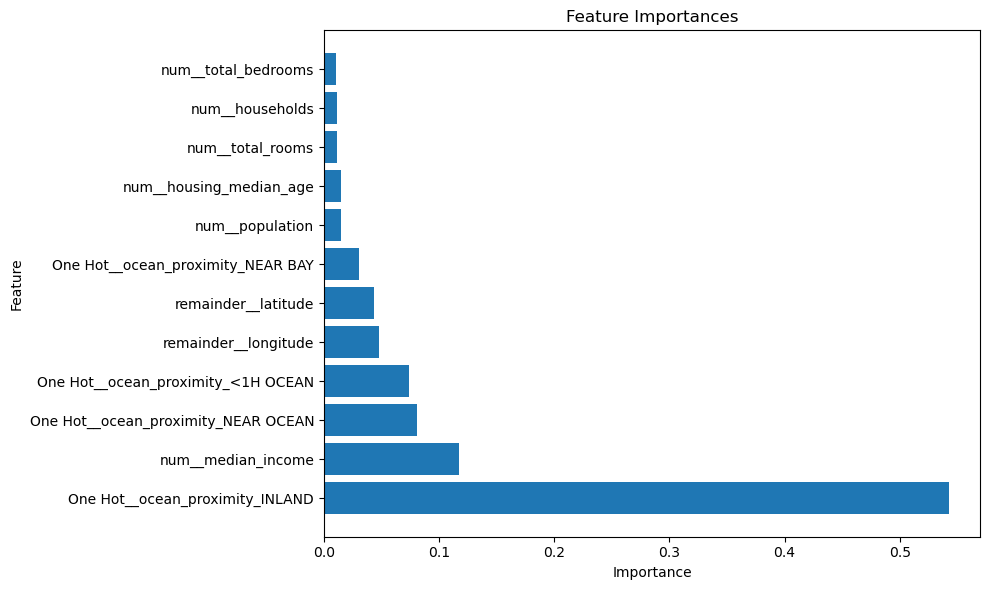

In [96]:
# Get the best estimator from the RandomizedSearchCV
best_estimator_xgb = random_search_xgb.best_estimator_

# Get the XGBoost model from the pipeline
xgb_model = best_estimator_xgb.named_steps['model']  # Assuming 'xgb' is the name of the XGBoost model in the pipeline

# Get the feature importances from the XGBoost model
feature_importances = xgb_model.feature_importances_

# Get feature names after preprocessing
feature_names = best_estimator_xgb.named_steps['feature_engineering'].get_feature_names_out()

# Create a DataFrame to store feature importances
feature_importance_hist = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the features based on their importance
feature_importance_hist = feature_importance_hist.sort_values(by='Importance', ascending=False)

# Create bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_hist['Feature'], feature_importance_hist['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()


# **7. Conclusion**
---

1. Diantara 12 model regresi yang diujikan, **XGBoost** adalah algoritma pemodelan yang paling baik dalam memprediksi harga jual properti.
2. Mengalami sedikit peningkatan setelah dilakukan tuning pada 2 model terbaik, MAPE untuk XGBRegressor adalah sekitar 17,7% dan untuk RandomForest Regressor adalah sekitar 18,5%. Setelah tuning, MAPE untuk XGBRegressor meningkat menjadi sekitar 16,9%, sedangkan untuk RandomForest Regressor meningkat menjadi sekitar 18,4%.
3. Perbandingan antara harga yang diprediksi (Predicted Price) dan harga aktual (Actual Price) menunjukkan bahwa prediksi harga pada data uji tersebut kurang akurat. Untuk mengatasi masalah tersebut, perlu dilakukan analisis lebih lanjut dan pengembangan algoritma prediksi yang lebih baik.
4. Feature Importance yang paling mempengaruhi hasil prediksi adalah jarak lokasi perumahan dari laut pada kategori INLAND dan termasuk median income sebagai pendapatan penduduk dalam menentukan nilai harga jual properti.


# **8. Recommendation**
---

1. Rekomendasi Model: Mengingat XGBoost adalah algoritma pemodelan terbaik dalam memprediksi harga jual properti, direkomendasikan untuk menggunakan model XGBoost untuk prediksi harga properti di masa depan.

2. Tuning Model: Tindakan tuning pada model XGBoost menghasilkan peningkatan kinerja yang signifikan, menurunkan MAPE dari sekitar 17,7% menjadi sekitar 16,9%. Ini menunjukkan pentingnya proses tuning untuk meningkatkan kinerja model. Meskipun demikian, masih ada ruang untuk meningkatkan kinerja model RandomForest Regressor dengan melakukan tuning lebih lanjut atau menggabungkan pendekatan ensemble.

3. Analisis Lebih Lanjut: Mengingat perbandingan antara harga yang diprediksi dan harga aktual menunjukkan ketidakakuratan prediksi, diperlukan analisis lebih lanjut untuk memahami penyebabnya. Mungkin perlu untuk memperbaiki pemrosesan data, menambah atau mengubah fitur-fitur yang digunakan, atau bahkan mencoba pendekatan model yang berbeda.

4. Feature Importance: Dengan mengetahui bahwa jarak lokasi perumahan dari laut (khususnya kategori INLAND) dan median income sangat mempengaruhi hasil prediksi, disarankan untuk lebih fokus pada fitur-fitur ini dalam pengembangan model dan dalam mengumpulkan data tambahan jika memungkinkan. Selain itu, mungkin juga berguna untuk melakukan analisis lebih mendalam terhadap fitur-fitur lainnya yang memiliki pengaruh signifikan terhadap harga properti.

Dengan mengikuti rekomendasi ini, diharapkan dapat meningkatkan kinerja model dan akurasi prediksi harga properti di masa depan.